In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df_goo = pd.read_csv("./GOOG.csv")
df_goo = df_goo.iloc[::5]
df_goo

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
10,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504
15,2004-09-10,2.530515,2.654052,2.523043,2.623417,2.623417,174804764
20,2004-09-17,2.849818,2.926282,2.828149,2.926282,2.926282,190350817
...,...,...,...,...,...,...,...
4835,2023-11-02,129.559998,130.089996,128.110001,128.580002,128.580002,24091700
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500
4845,2023-11-16,136.960007,138.880005,136.080002,138.699997,138.699997,17615100
4850,2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600


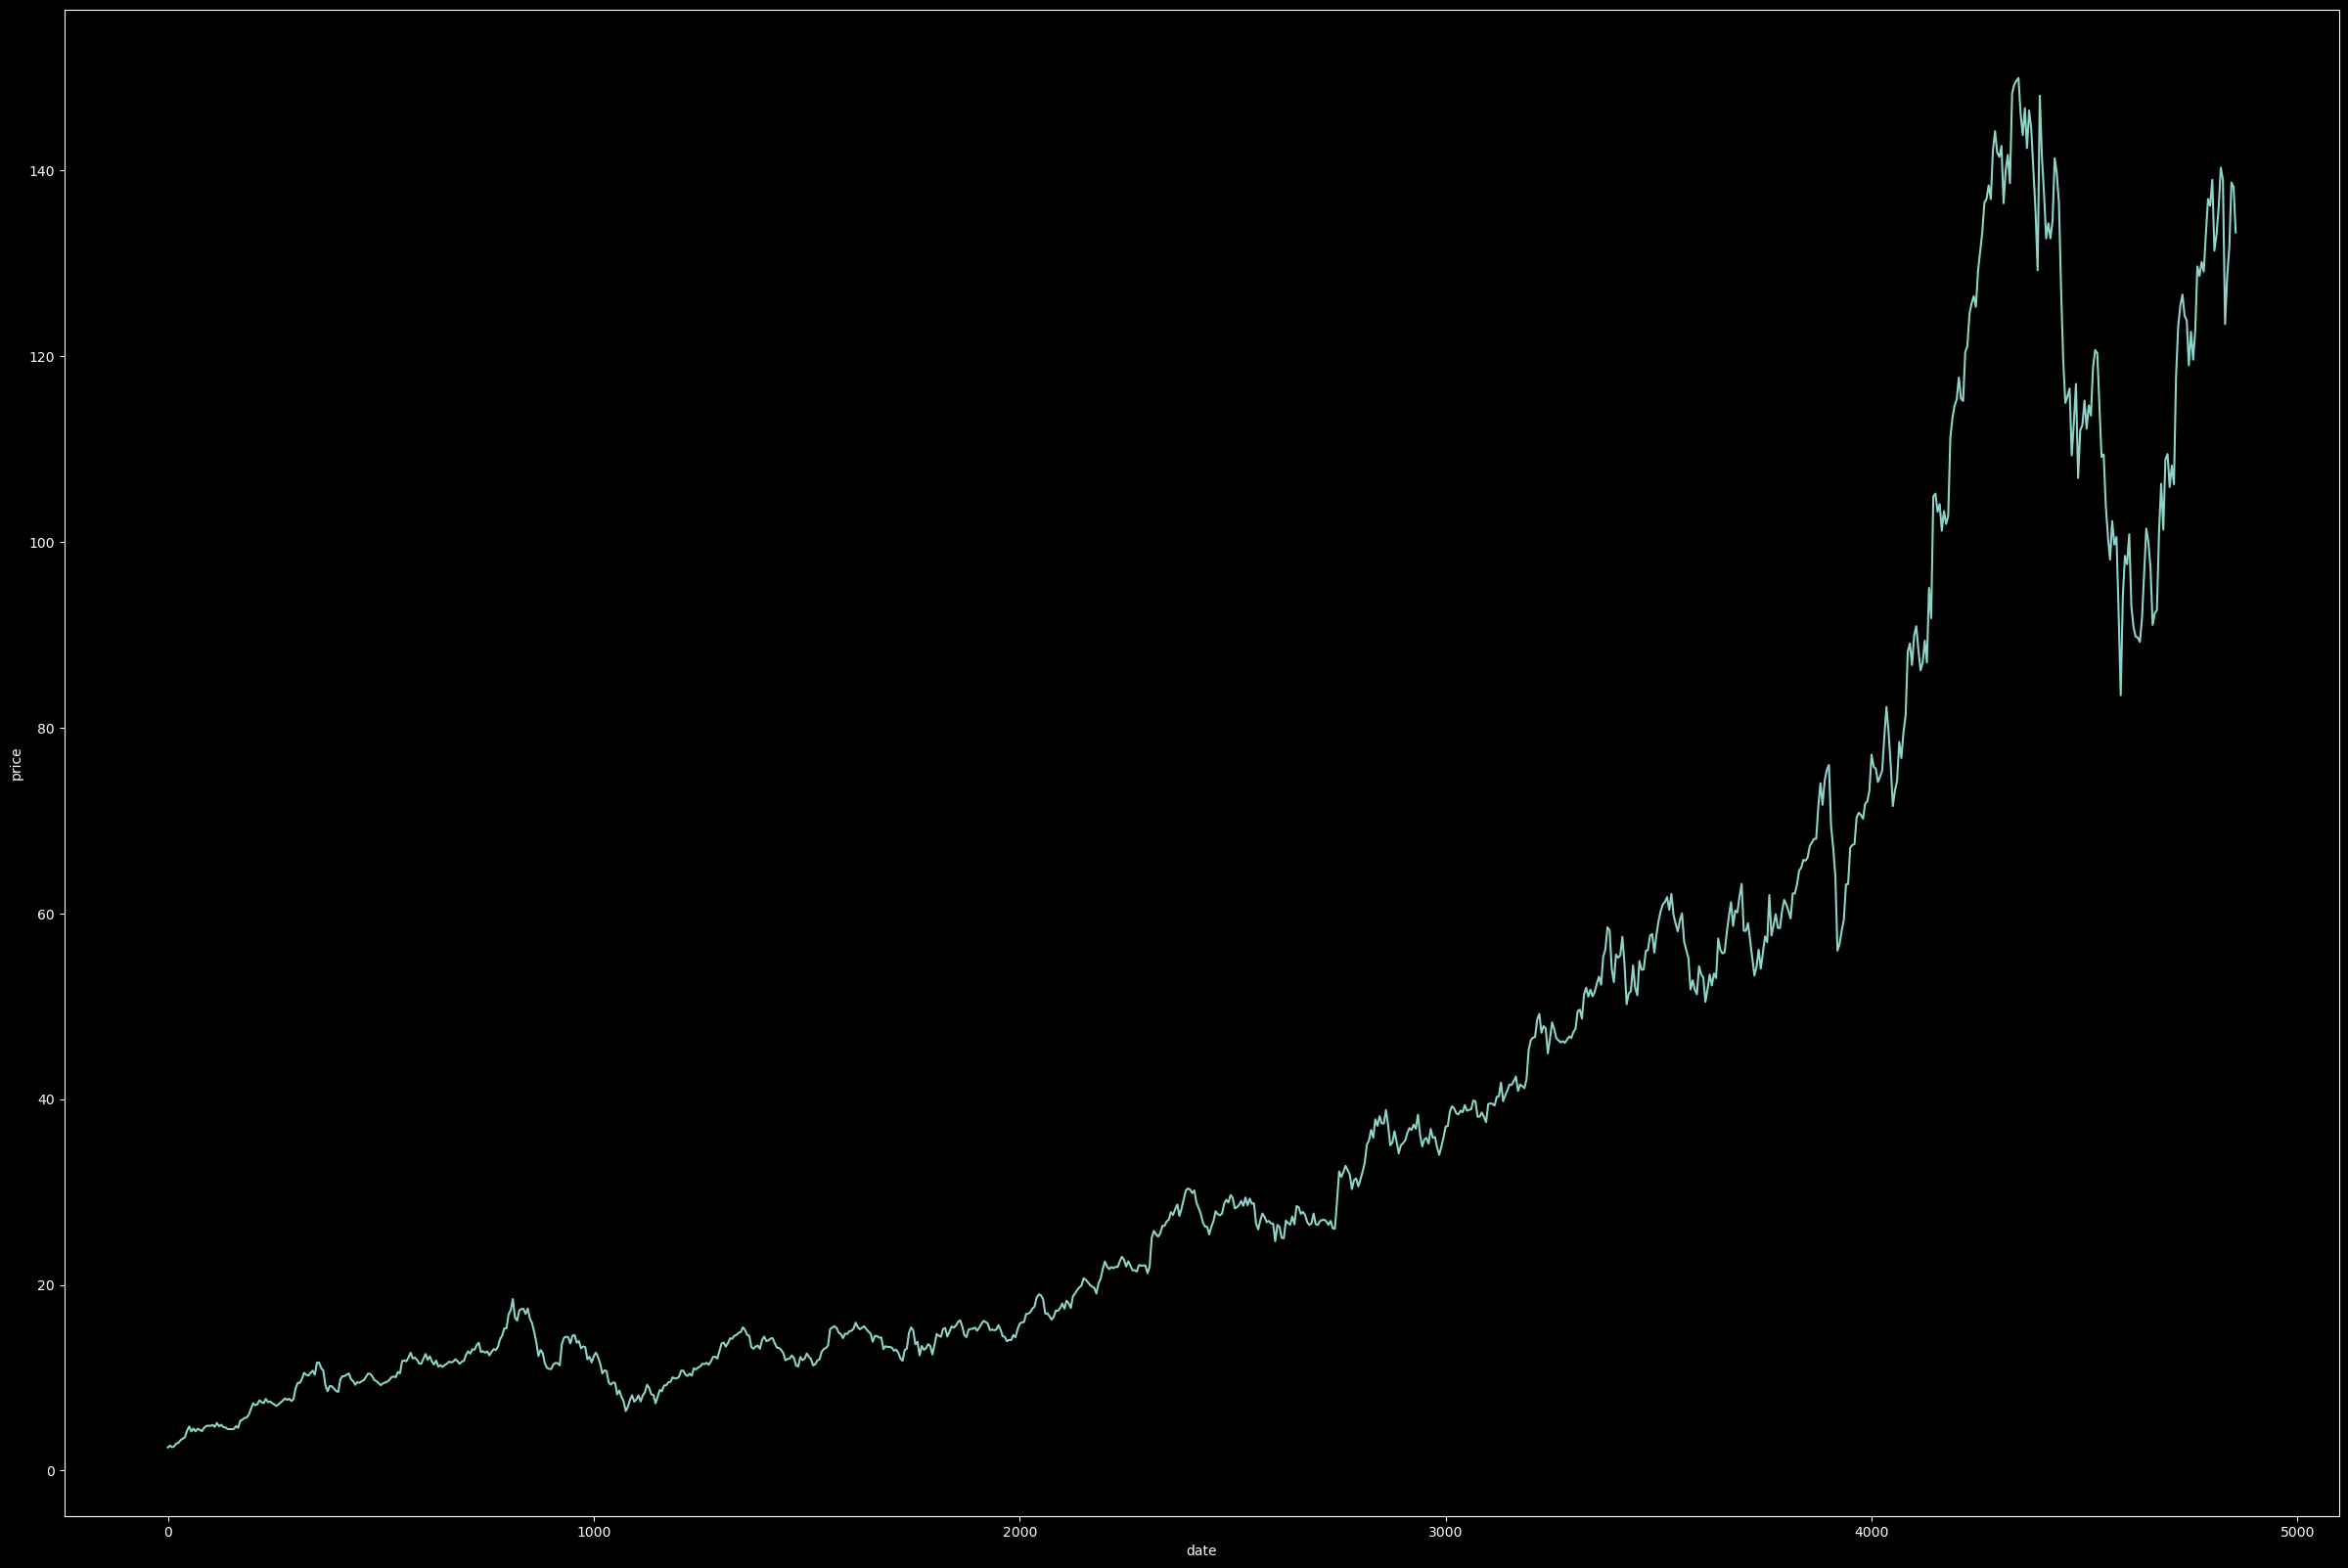

In [3]:
plt.figure(figsize=(30, 20))
plt.plot(df_goo["Close"])
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [4]:
dataset = df_goo[["Close"]].values
train_len = int(0.95 * len(dataset))
val_len = len(dataset) - train_len
print(train_len, val_len)

923 49


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scale_dataset = scaler.fit_transform(dataset)
scale_dataset

array([[0.00000000e+00],
       [1.27866189e-03],
       [1.97621803e-04],
       [8.42869874e-04],
       [2.89684130e-03],
       [3.29209168e-03],
       [5.44572173e-03],
       [6.31561710e-03],
       [7.39327307e-03],
       [1.21768668e-02],
       [1.52527546e-02],
       [1.16566142e-02],
       [1.37933508e-02],
       [1.16650575e-02],
       [1.36328865e-02],
       [1.28288628e-02],
       [1.18424153e-02],
       [1.43034646e-02],
       [1.56108474e-02],
       [1.59047505e-02],
       [1.57425976e-02],
       [1.63777068e-02],
       [1.50162730e-02],
       [1.78404812e-02],
       [1.54115302e-02],
       [1.65651966e-02],
       [1.49571560e-02],
       [1.46395980e-02],
       [1.34521514e-02],
       [1.33355993e-02],
       [1.33288446e-02],
       [1.34622834e-02],
       [1.54909180e-02],
       [1.43000873e-02],
       [1.95042682e-02],
       [2.02120106e-02],
       [2.15666830e-02],
       [2.17727549e-02],
       [2.38621952e-02],
       [2.79819587e-02],


In [6]:
train_dataset = scale_dataset[0:train_len,:]

x_train = []
y_train = []
for i in range(20, train_len):
    x_train.append(train_dataset[i-20:i, 0])
    y_train.append(train_dataset[i, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scale_dataset[train_len-20:, :]
x_test = []
y_test = dataset[train_len:,:]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(903, 20, 1) (49, 20, 1) (903,) (49, 1)


In [8]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape = (20, 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
903/903 [==============================] - 9s 7ms/step - loss: 0.0026
Epoch 2/5
903/903 [==============================] - 7s 7ms/step - loss: 0.0017
Epoch 3/5
903/903 [==============================] - 7s 8ms/step - loss: 6.5822e-04
Epoch 4/5
903/903 [==============================] - 7s 8ms/step - loss: 0.0011
Epoch 5/5
903/903 [==============================] - 7s 8ms/step - loss: 7.5489e-04


In [9]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
mse = np.mean((predictions - y_test)**2)
mse

2/2 [==============================] - 1s 7ms/step


63.40095708329744

In [10]:
print(predictions.shape)

(49, 1)


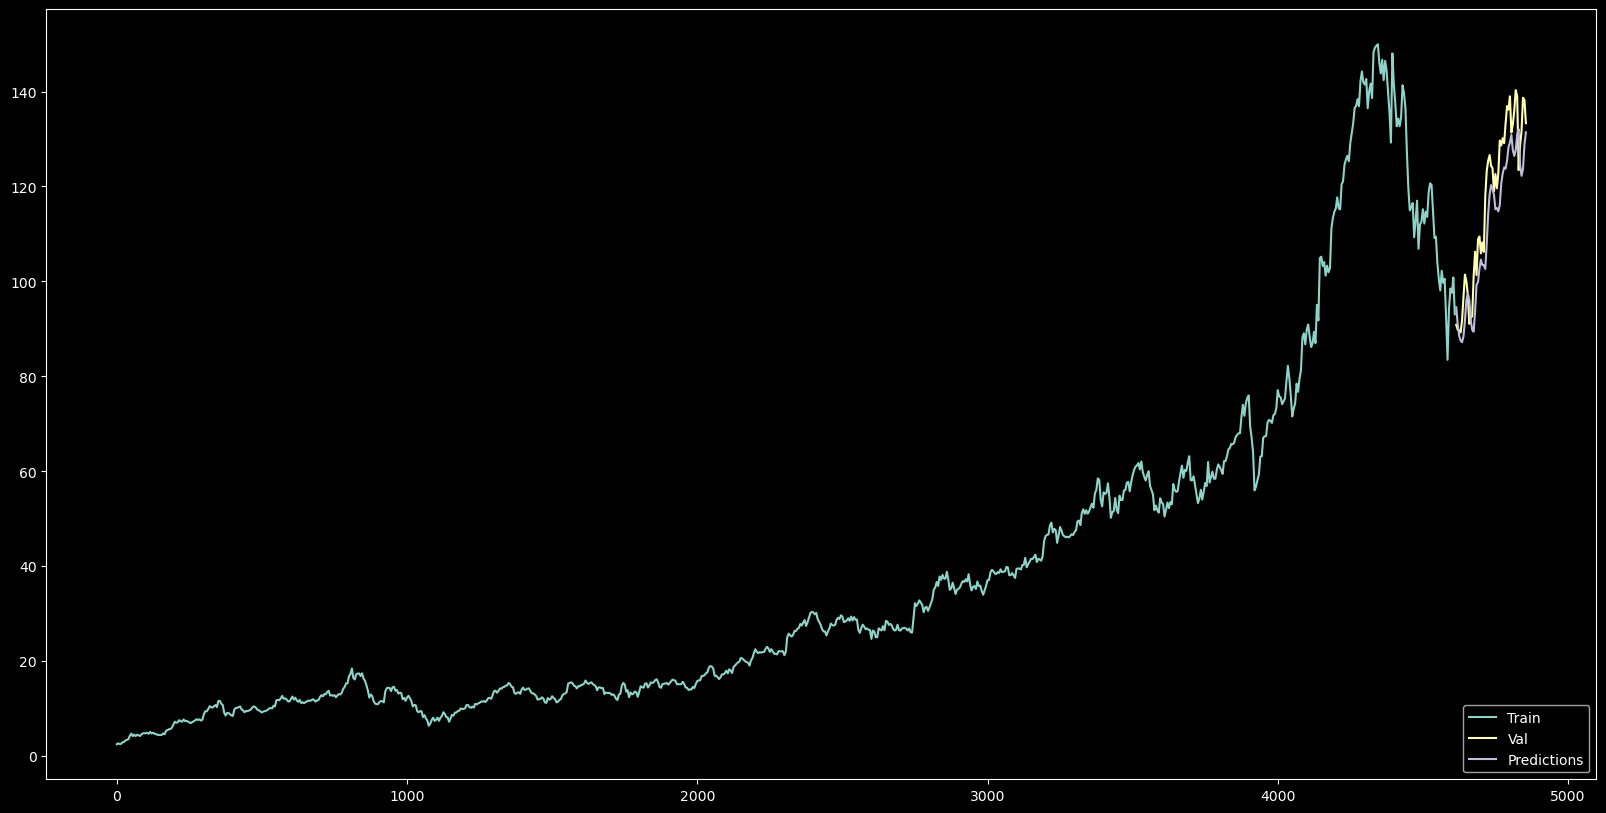

In [15]:
train = df_goo[["Close"]][:train_len]
test = df_goo[["Close"]][train_len:]
test['Predictions'] = predictions
plt.figure(figsize=(20, 10))
plt.plot(train["Close"])
plt.plot(test[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

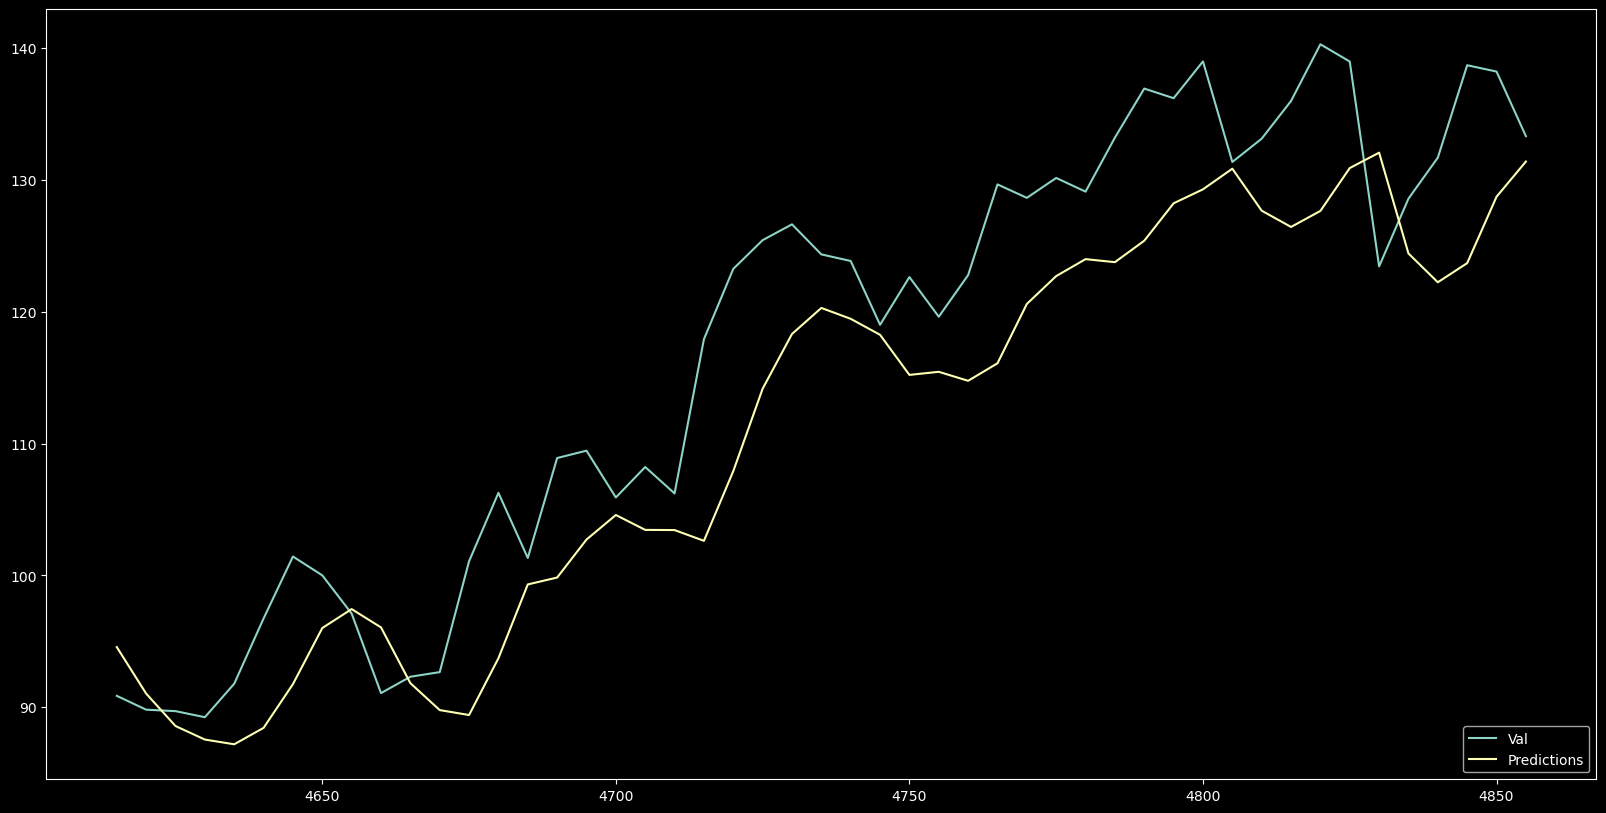

In [12]:
test = df_goo[["Close"]][train_len:]
test['Predictions'] = predictions
plt.figure(figsize=(20, 10))
plt.plot(test[["Close", "Predictions"]])
plt.legend(["Val", "Predictions"], loc="lower right")
plt.show()

In [13]:
test

,Close,Predictions
4615,90.860001,94.558662
4620,89.809998,91.029808
4625,89.699997,88.570557
4630,89.239998,87.543282
4635,91.779999,87.185905
4640,96.730003,88.430801
4645,101.430000,91.749725
4650,100.000000,96.004532
4655,97.099998,97.441811
4660,91.070000,96.052711


Profit per stock if behave perfectly

In [14]:
predicted_profit = 0
actual_profit = 0
price_pred = np.array(test[["Predictions"]])
price_pred = np.reshape(price_pred, (price_pred.shape[0]))
for i in range(1, len(price_pred)):
    if (price_pred[i-1] < price_pred[i]):
        predicted_profit += (price_pred[i] - price_pred[i-1])
print(predicted_profit)
price = np.array(test[["Close"]])
price = np.reshape(price, (price.shape[0]))
for i in range(1, len(price)):
    if (price[i-1] < price[i]):
        actual_profit += (price[i] - price[i-1])
print(actual_profit)

74.44760131835938
108.21497899999999
